# Reaching task Python model for assessment of Motor Learning and cerebellar function

## Motivation

The cerebellum is central to motor control, coordinating timing and precision, and ensuring smooth execution of movement. It plays a pivotal role in motor learning by adjusting and fine-tuning motor commands to minimize errors. Through reaching task models, researchers can observe how the cerebellum learns from motor errors to improve movement accuracy over time, highlighting its role in sensorimotor learning and adaptation. These models help in understanding the underlying mechanisms of cerebellar function in learning, such as how it processes sensory feedback to predict and correct future movements.
The use of reaching task models in the assessment of motor learning and adaptation offers a nuanced approach to understanding how the human motor system responds to changes and learns over time. These models are particularly valuable in dissecting the complexities of cerebellar function, motor perturbations, motor noise, and the impact of different types of feedback on motor learning. Each of these elements plays a crucial role in the broader context of motor control and adaptation, offering insights into both normal and disordered motor function.

## Overview of the program

The program is a Python-based experimental setup, suitable for neuromotor study, namely, motor learning and motor adaptation. Utilizing libraries such as Pygame for graphical interface and interaction, numpy for numerical operations, and pandas for data management, it provides a versatile platform for implementing a reaching game,where participants are tasked with moving a cursor to a target. These tasks can be used to simulate various conditions affecting motor functions, such as perturbations similar to those experienced during prism adaptation, and the effects of cerebellar dysfunction.

The playing field consinst of a starting position in the center of the screen and the target, which is located within a circle of a certain radius around the starting position. Using the mouse, the participant's task is to move the cursor from the starting postition to the target. While moving a cursor towards a target, participant undergos various tests that simulate conditions such as motor noise and visual or motor perturbations. Both successful attempts on the target or misses require from the participant to go back to the starting position for the target to reappear. Successfull attempts on the target additionally increase the participant's score. The cursor would be typically shown within a limited region around the starting position - the Mask radius. If the participant takes too long to reach the target, a warning message 'move faster' will be displayed and the attempt data will be marked correspondingly.

The angle between the target and the end position of the cursor for each attemt is denoted as an 'error angle' and is the main output indicator of the program, used to judge about the participant's performance: motor learning and adaptation. 

In order to study generalization in motor adaptation, the target position on the target radius circle can change within the course of the experiment.

Overview of the playing field:

![screenshot 1.png](<attachment:screenshot 1.png>)
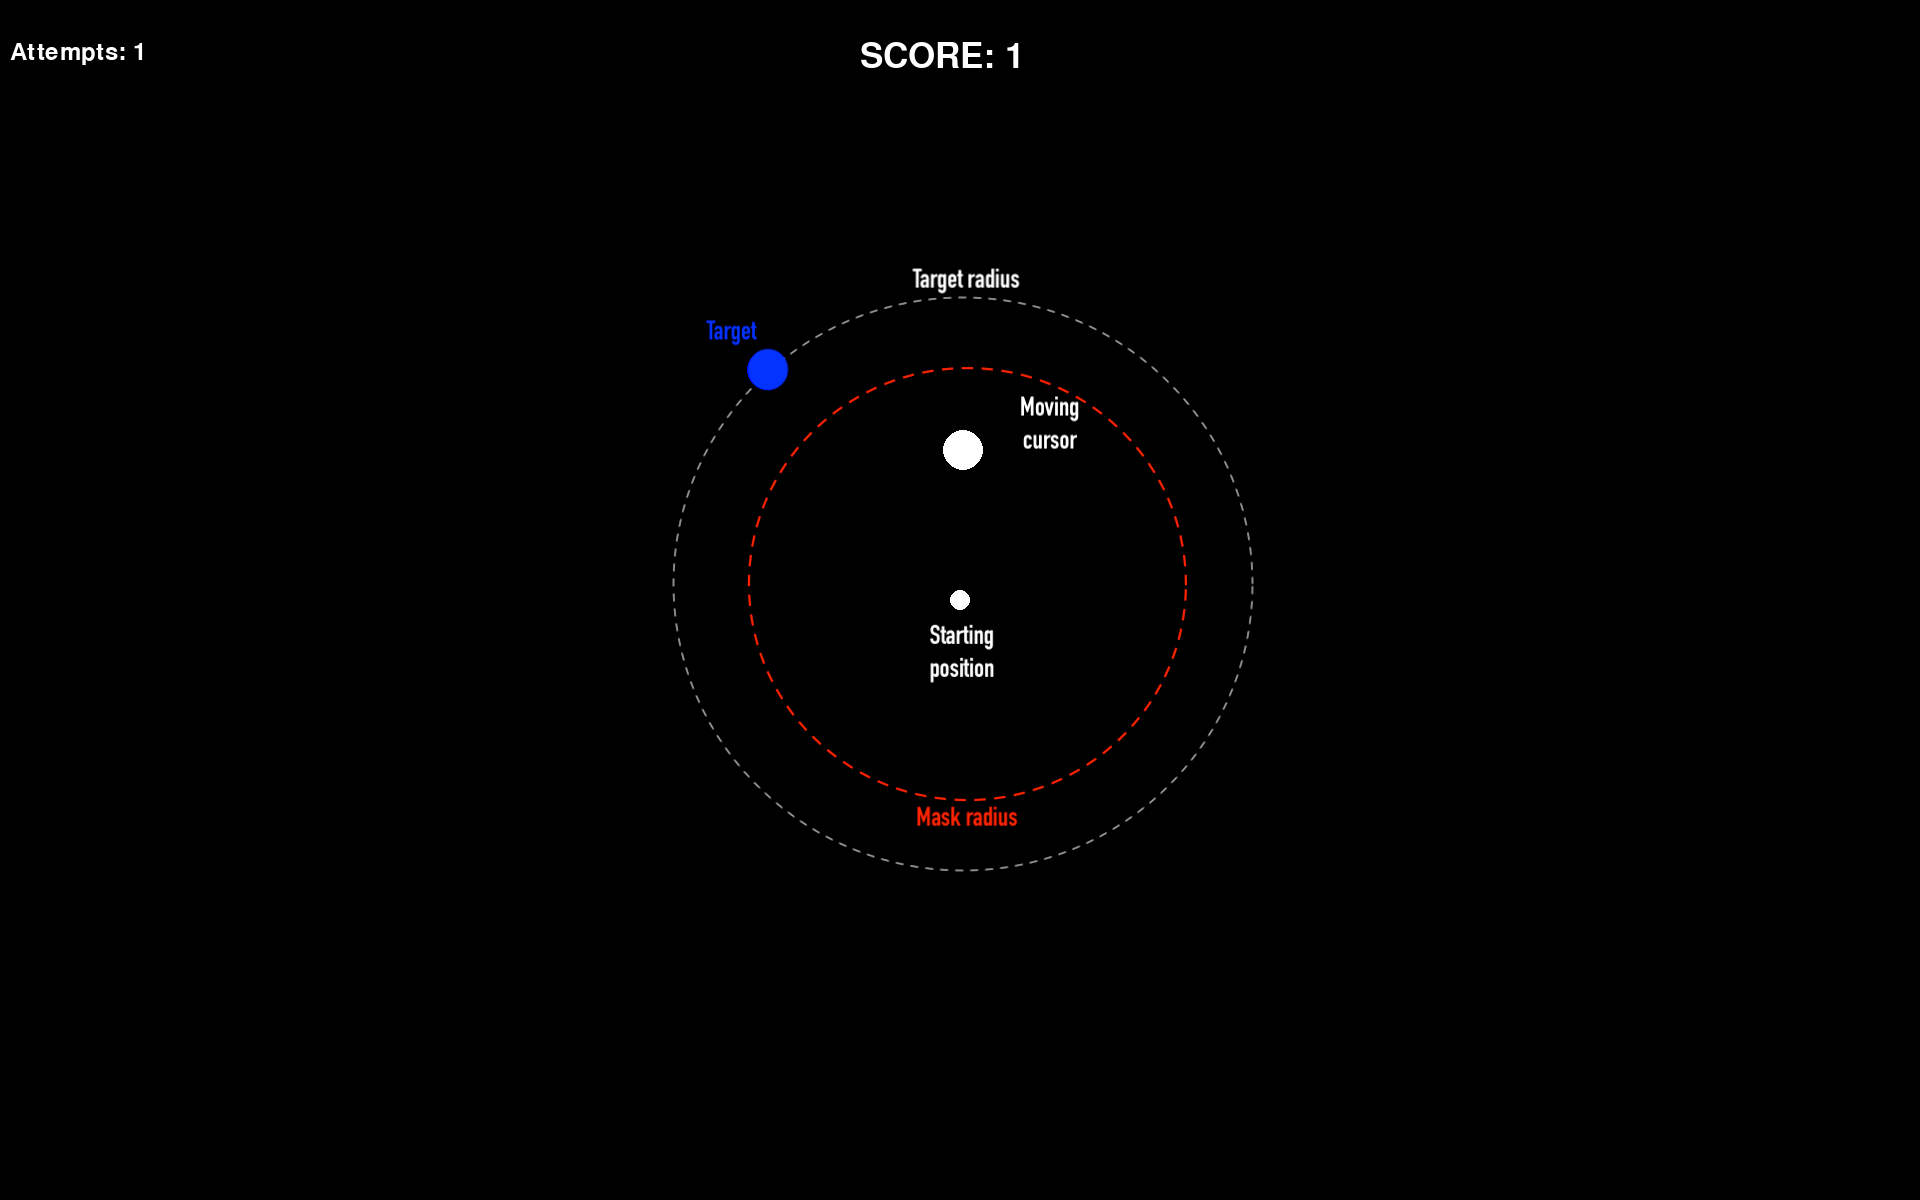

Definition of the error angle:

![screenshot 2.png](<attachment:screenshot 2.png>)
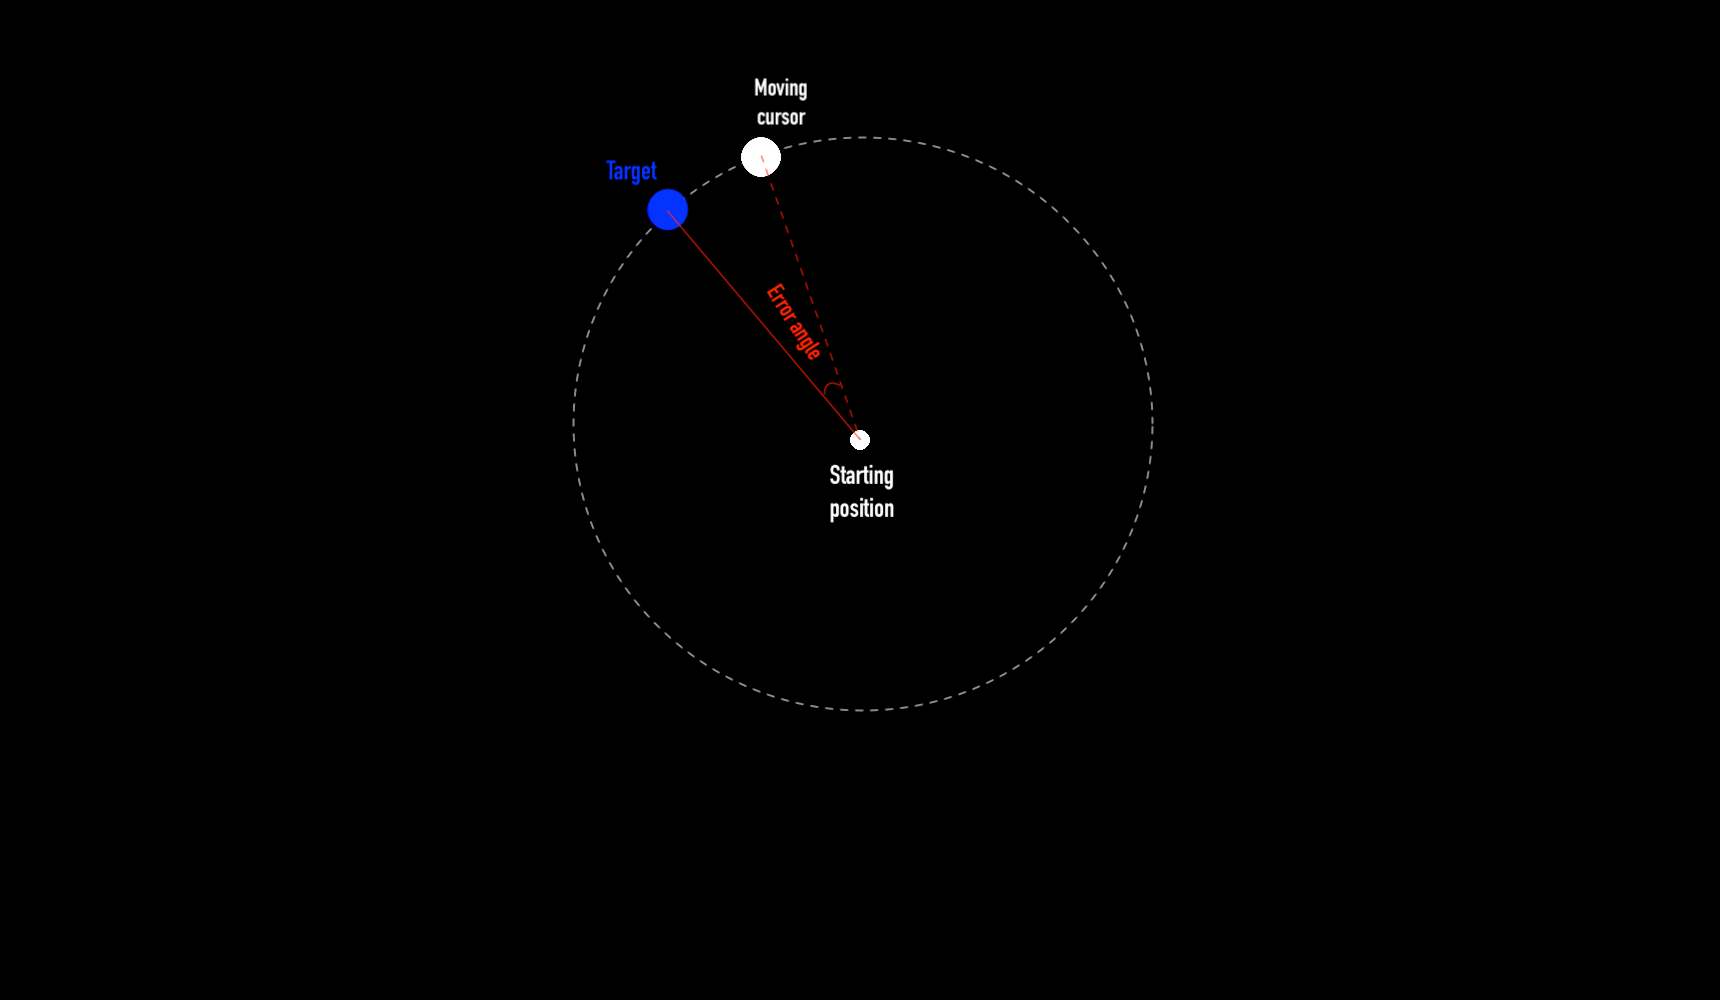

## Perturbation

Motor perturbation refers to the intentional alteration of motor actions through external forces or modifications to sensory feedback, thereby challenging the motor system to adapt its responses. In the context of motor learning and adaptation studies, such perturbations are critical for understanding how the brain adjusts motor commands to compensate for changes in the environment, body mechanics, or sensory inputs.

The program is specifically designed to introduce controlled perturbations to the cursor movement during a reaching task. The cursor's movement direction can be altered from the actual movement direction intended by the participant. For example, moving the mouse straight might result in the cursor moving at an angle to the right or left of the intended direction. This simulates visual or mechanical perturbations, requiring the participant to adapt their movements to achieve the target accurately. Three perturbation modes can be applied:
1. gradual - gradually increasing perturbation in 10 steps after every 3 attempts until a certain max angle,
2. sudden - fixed perturbation of maximal degree,
3. random - random perturbation for each attempt (from -pi/4 to pi/4)

 Additionally motor noise (i.e. random additional perturbation angle adjustments after each attempt) can be introduced to simulate the variability and inaccuracy in motor execution, mimicking conditions like cerebellar dysfunction. This noise can vary in intensity, creating a more challenging and unpredictable task environment that requires fine-tuned motor adjustments.

![screenshot 3.png](<attachment:screenshot 3.png>)
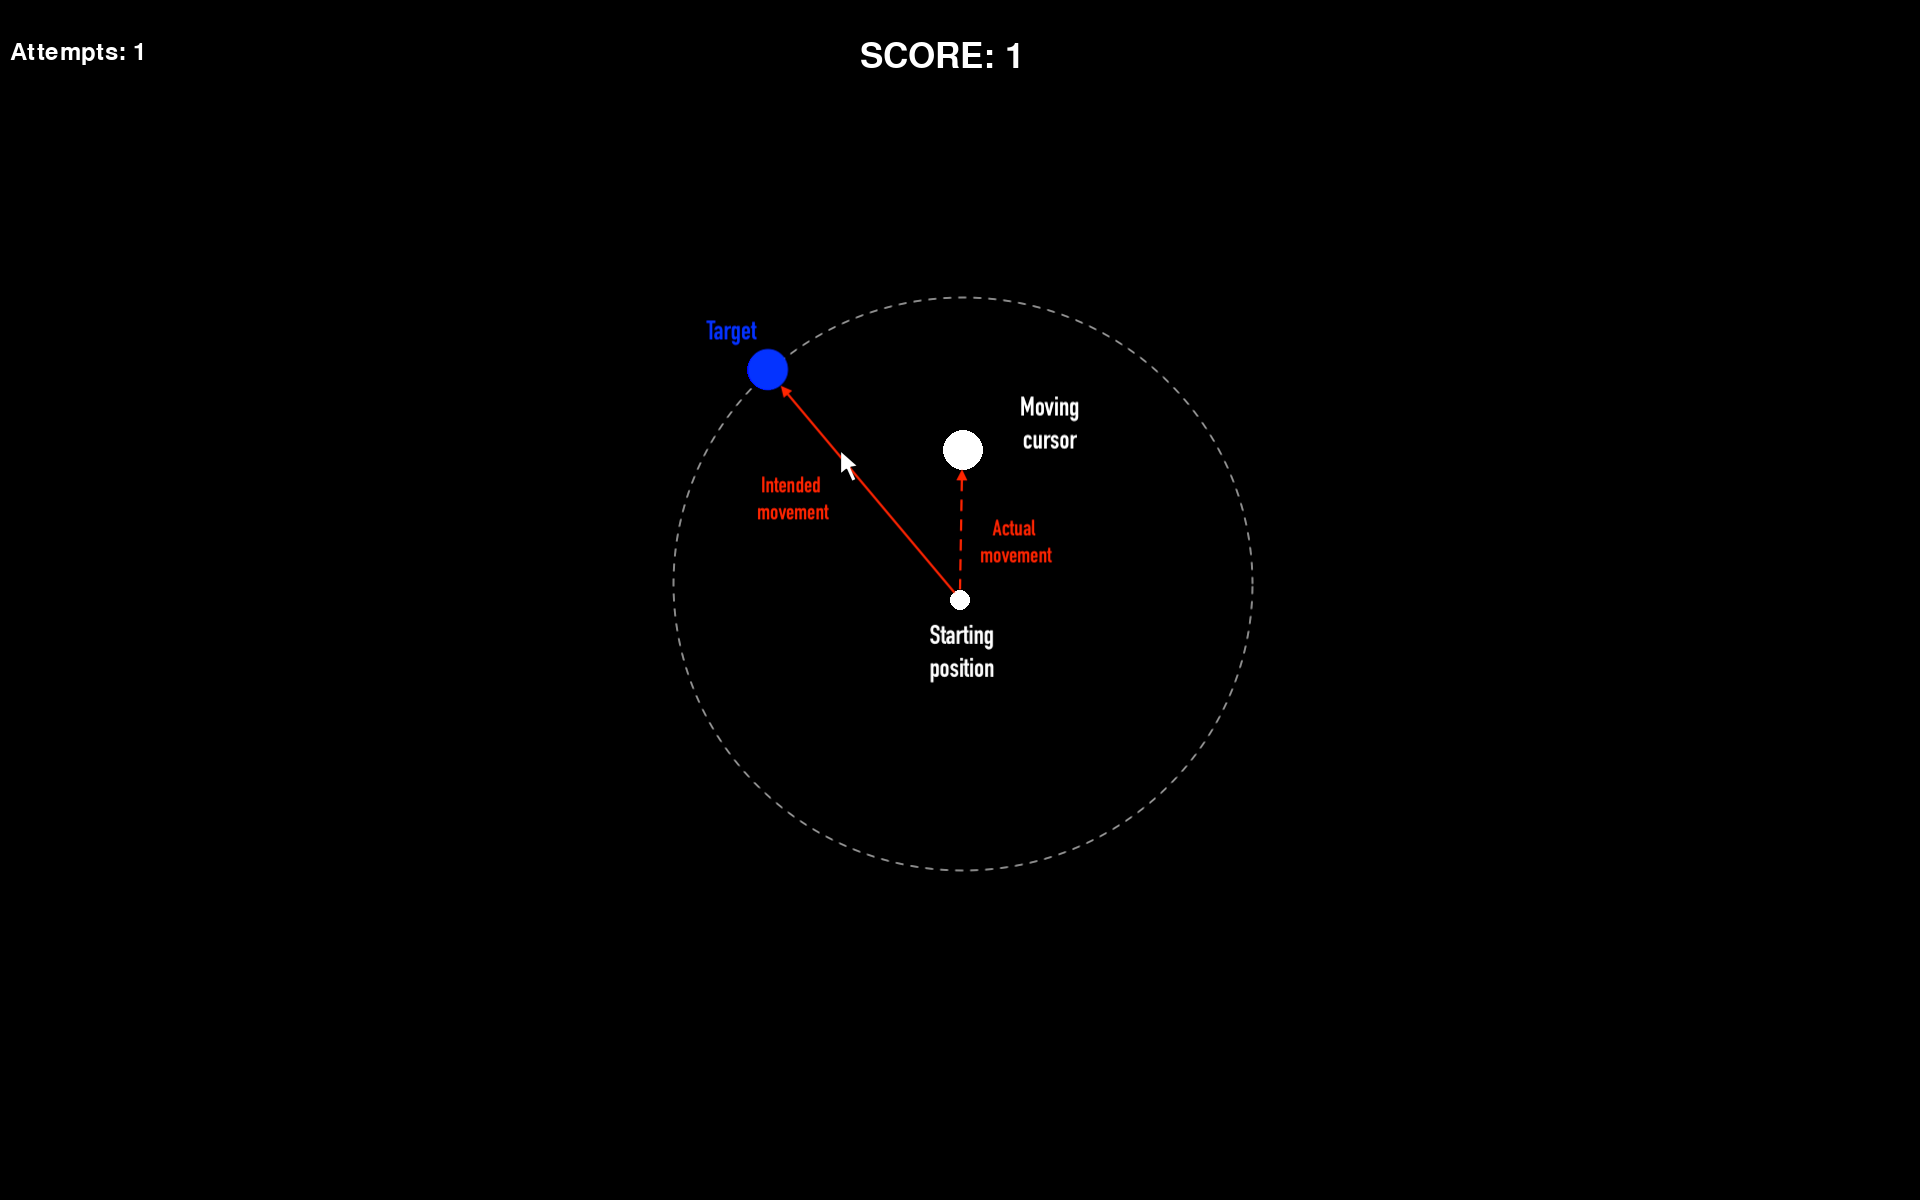

## Feedback

Feedback is crucial for informing participants about the outcomes of their actions, guiding the learning process, and facilitating the adjustment of motor commands to improve task performance. In this context, motor learning can be subdivided into error-based (using task-specific prediction error to update the internal model) and reinforcement learning (using an external reward signal in order to improve performance). The program allows to incorporate various feedback types into the experimental setup allowing for studying the motor adaptation under such conditions. Typically, in this regime the cursor would be hidden from the participant and one of the three feedbback types would be enabled: 
1. Reinforcement Feedback: this mode represents a simplified feedback mechanism where the outcome of reaching the target (success or failure) is clearly indicated,through changing the color of the starting position to red (missed), yellow (nearly hit) and green (hit). This can help participants understand the immediate result of their actions, reinforcing correct movements and discouraging incorrect ones.
2. Trajectory Feedback: providing visual feedback on the trajectory of the cursor movement offers detailed information on the performance throughout the task. This can help participants learn the dynamics of their movements and understand how motor noise or perturbations affect their accuracy, enabling more precise adjustments.
3. Endpoint Feedback: Focusing on the final position of the cursor, this feedback type emphasizes the outcome rather than the process. 

Different types of feedback can be used simultaneously or apart

![screenshot 4.png](<attachment:screenshot 4.png>)
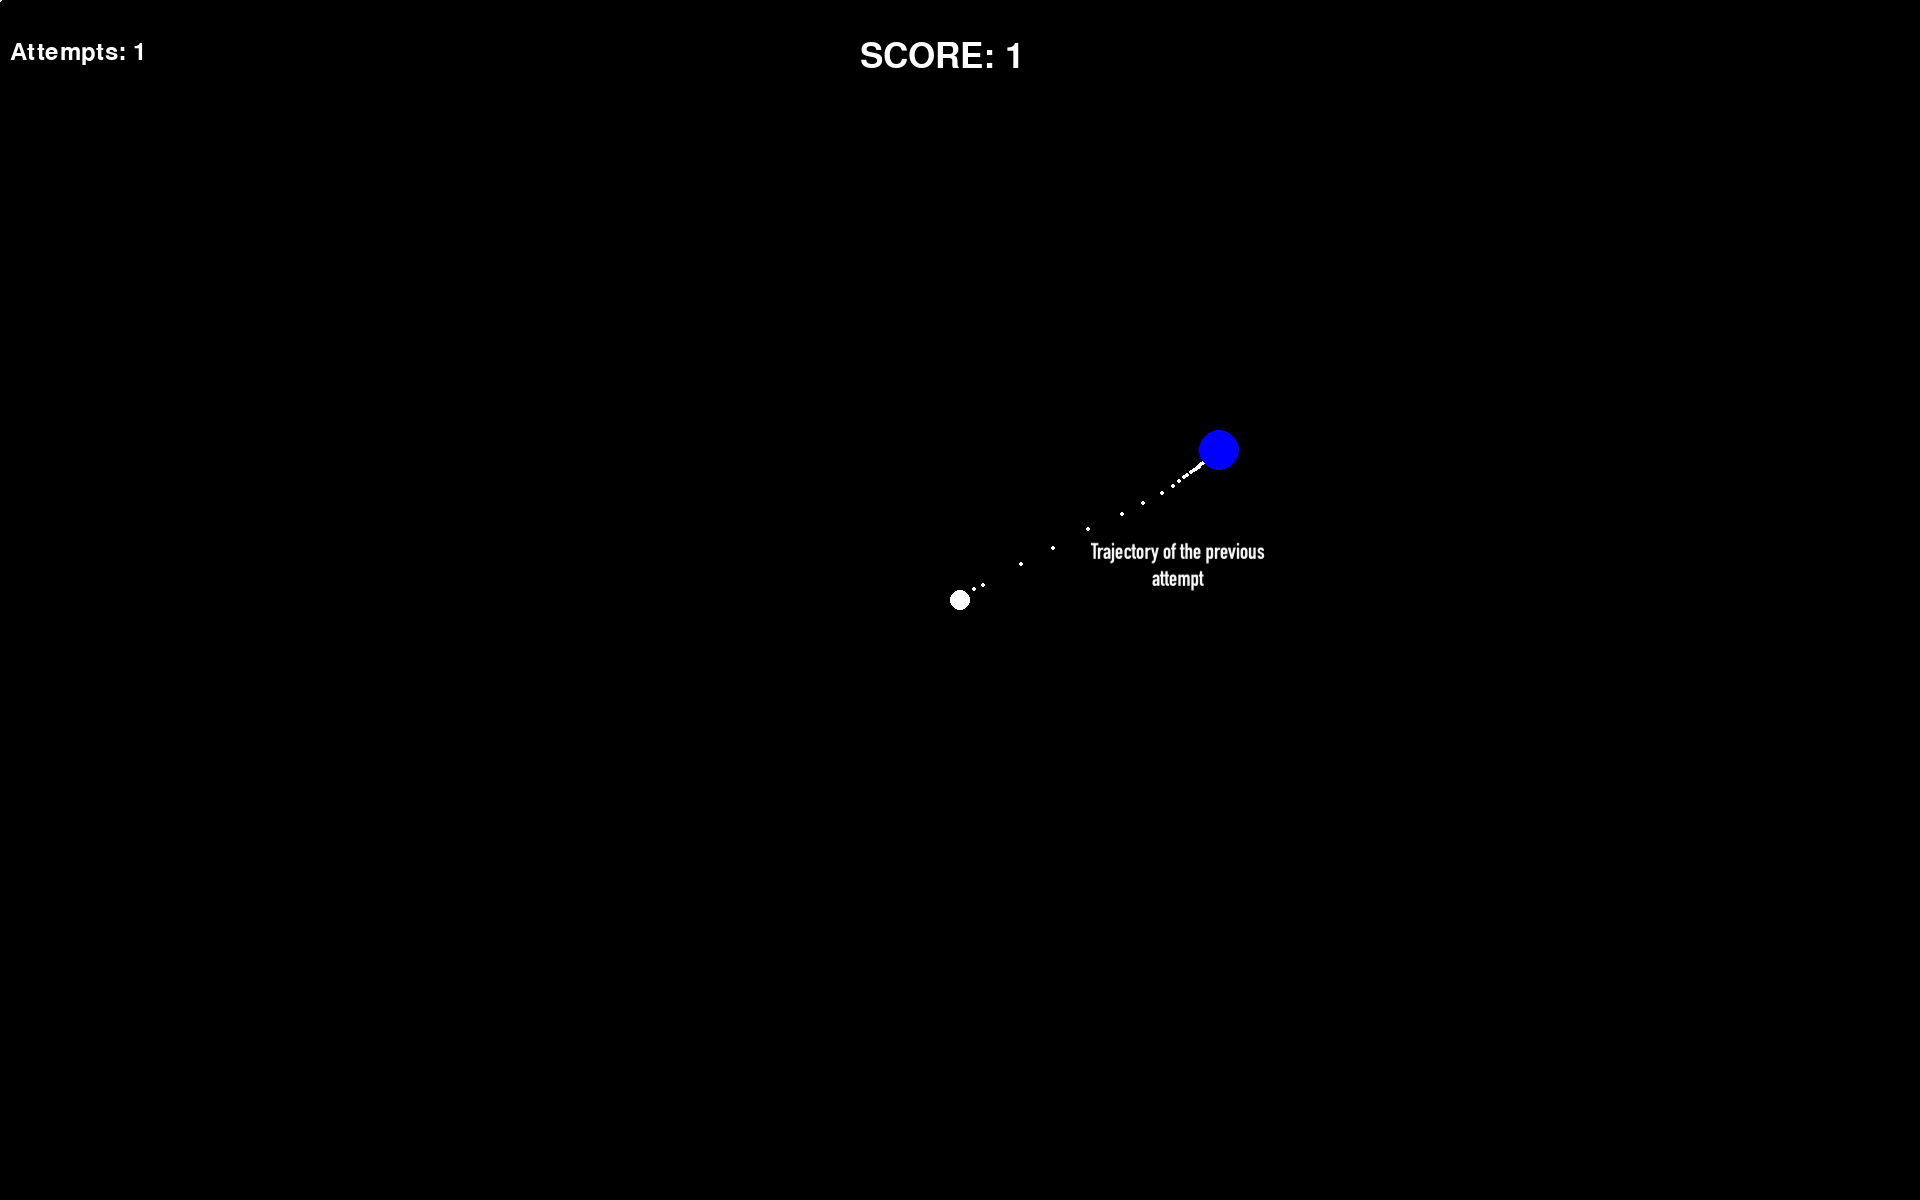

![screenshot 5.png](<attachment:screenshot 5.png>)
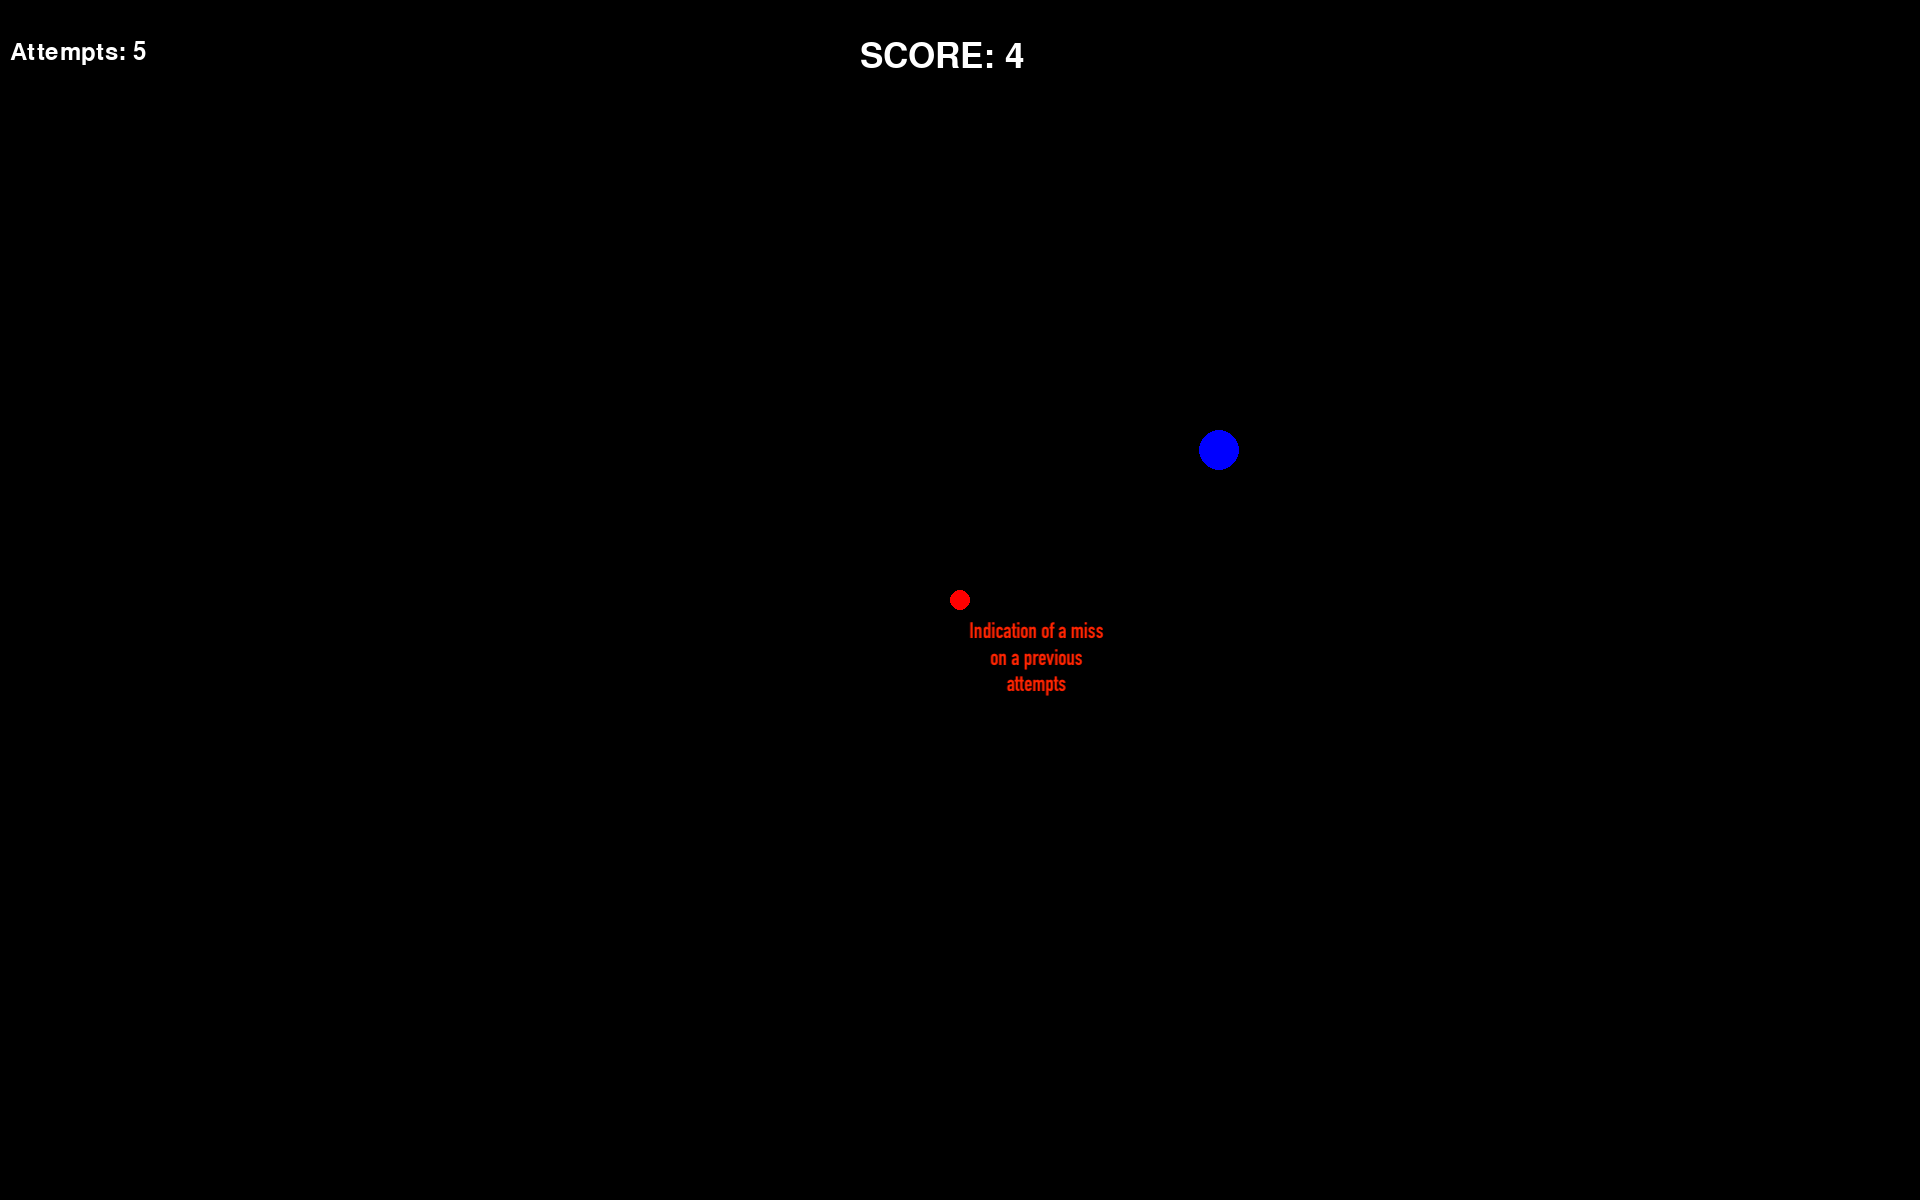

![fscreenshot 6.png](<attachment:fscreenshot 6.png>)
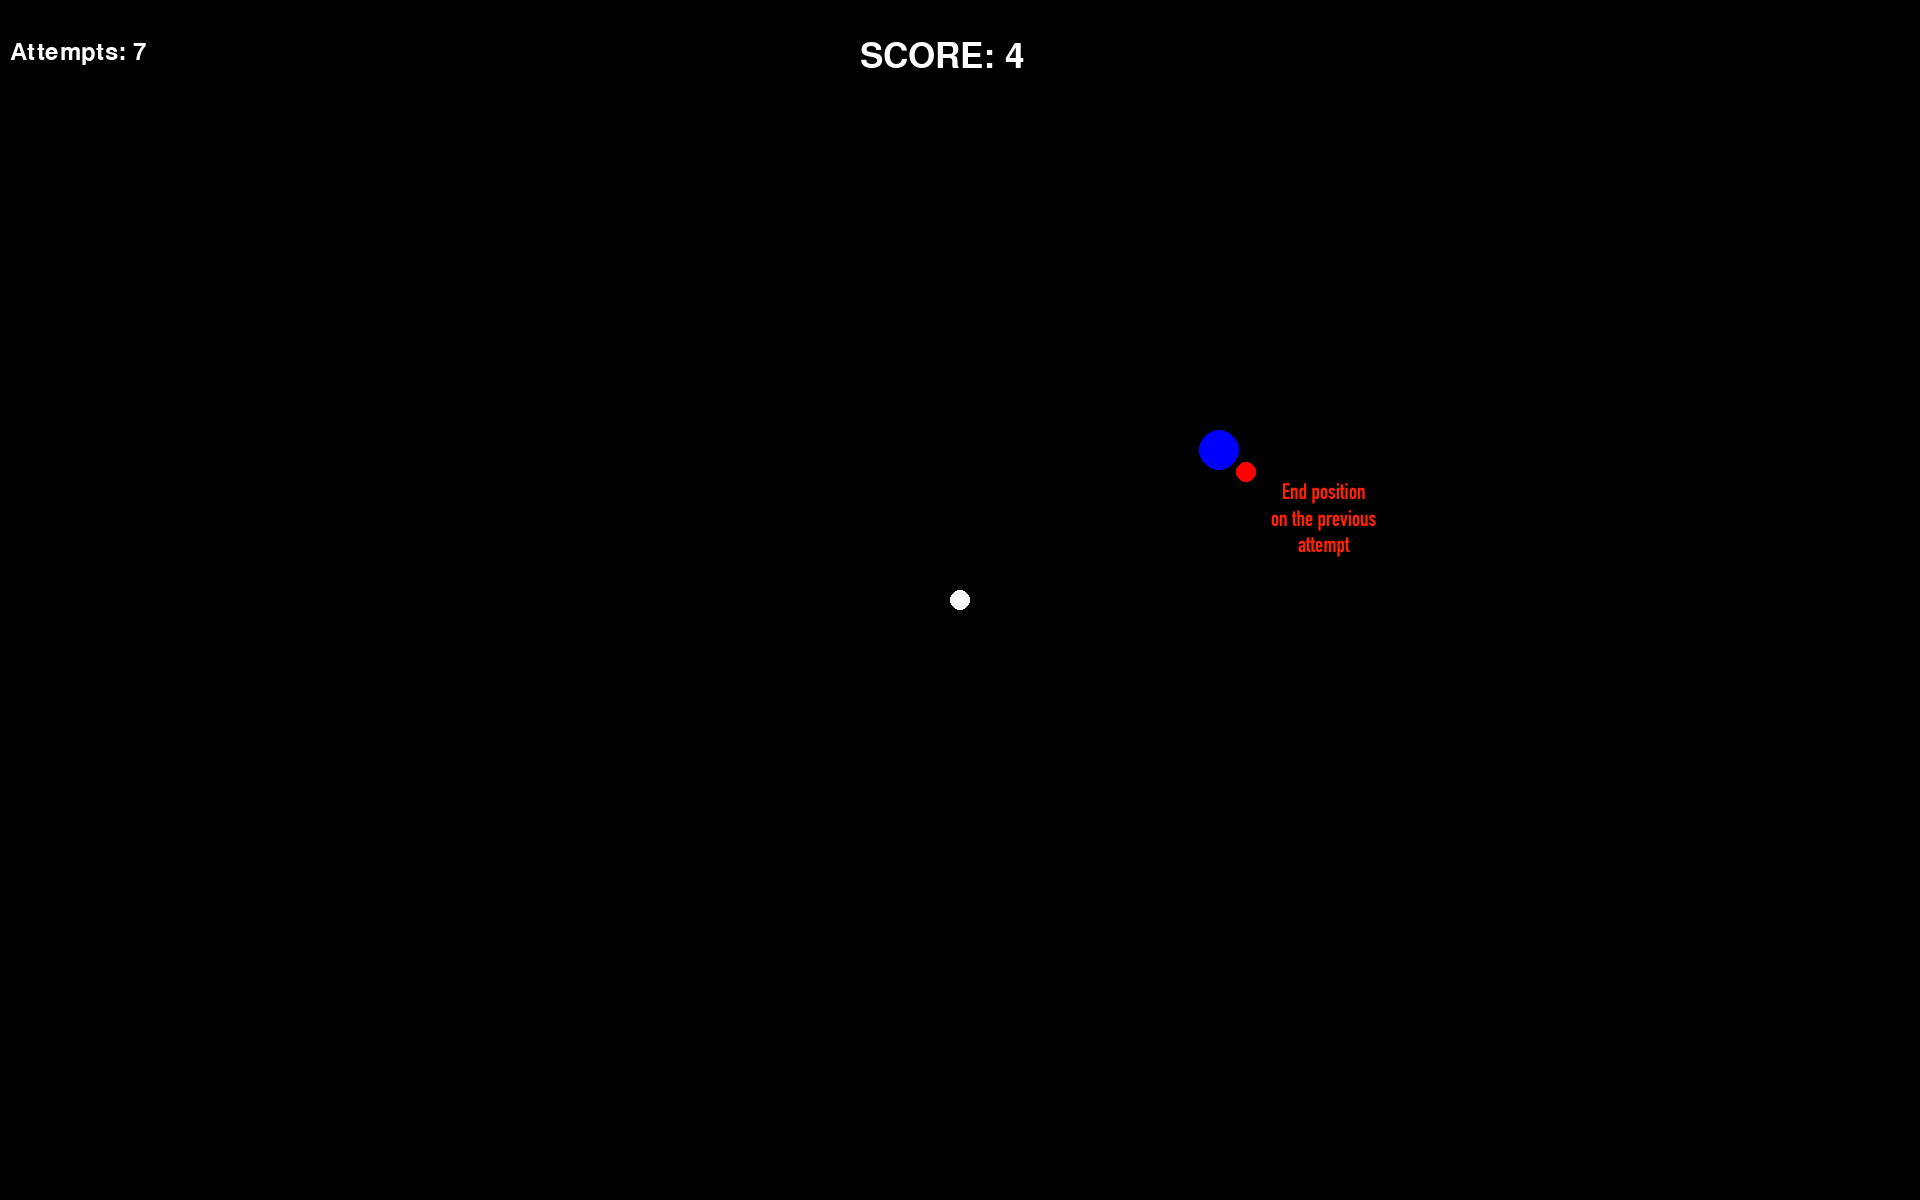

## Modularity

The program's design offers flexibility in configuring experimental conditions through supplementarty experimental scripts. Researchers can easily modify parameters related to perturbations and feedback to explore specific research questions, such as the impact of varying degrees of motor noise or the effectiveness of different feedback types in facilitating motor learning.

The script defines a set of parameters crucial for conducting the motor noise experiment. These include the experimental state: `running`, the intensity of motor noise: `motor_noise`, the angle of target presentation: `sequence_target`, specifics about perturbations: `perturbation_mode` and types of feedback: `feedback`. Additionally, sometimes is it hard to return the cursor back to the starting position if it is set as invisible during the feedback regimes - therefore assisting mechanisms can be enabled.

Finally, the script accounts for manual interventions (escape, test_perturbation, end perturbation, mask400), allowing the experimenter to make on-the-fly adjustments to the experimental setup in response to observed participant behaviors or to test specific hypotheses.


The script works as follows.

Only parameters listed in 'script_parameters' dictionary of this script are also changed in the main program.
Other parameters of the main program will remain default.
The full list of possible parameters and their possible values:

    running: bool, True if the experiment is running, set to False to end the experiment
    motor_noise: int, the std. dev. of normal random distribution to generate motor noise perturbation, mean is 0
    target_mode: str, 'sequence', 'random' or 'fix', the mode of target presentation:
        sequence - set explicit values of target angles in sequence_target parameter,
        random - random angle for each trial,
        fix - 0 degrees for each attempt
    sequence_target: int, the explicit target angle for the sequence mode

    perturbation_mode: str, 'gradual', 'sudden' or 'random', the type of perturbation:
        gradual - gradually increasing perturbation in 10 steps after every 3 attempts until 'max_perturbation',
        sudden - fixed perturbation of 'max_perturbation' degree,
        random - random perturbation for each attempt (from -pi/4 to pi/4)
        or bool, False if the perturbation is inactive
    max_perturbation: int, the maximum perturbation angle for the sudden perturbation type. Use positive values for
        counter-clockwise perturbation and negative values for clockwise perturbation
    MASK_RADIUS: int, the radius of the area where the cursor is visible, set to 0 to hide the cursor entirely

    FEEDBACK:
    feedback: str, 'reinforcement', 'trajectory' or 'end_pos' - the type of feedback

    ASSISTANCE:
    assisting_circle: bool, True if the assisting circle is active
    assisting_flicker: bool, True if the assisting flickering cursor is active
    limited_mask: bool, True if the cursor shall be visible beyond some distance from the center

    EVENTS (needed for interventions via keyboard):
    escape: bool, True if the escape key was pressed, quits the game
    test_perturbation: bool, True if 4 key was pressed, starts the sudden perturbation regime
    end perturbation: bool, True if 5 key was pressed, ends the sudden perturbation regime
    mask400: bool, True if 6 key was pressed, sets the mask radius to 400 (makes cursor visible)

Necessary parameters can be straightforwardly added to the dictionary within the update_parameters function by calling
the corresponding key of the `script_parameters` dictionary and setting its value.
Any parameters can be deleted from the dictionary within the update_parameters function by using `del` command
(e.g. if you don't know what `MASK_RADIUS` is by default), default values will be then restored and used in the main program.

Example of the script file below:

In [ ]:
parameters = {
    'running': True,
    'motor_noise': 0,
    'target_mode': 'sequence',
    'sequence_target': 0,
    'perturbation_mode': False,
    'perturbation_type': 'gradual',
    'feedback': 'reinforcement',
    'MASK_RADIUS': 0, # set to 0 to hide the cursor entirely
    'assisting_circle': True,
    'max_perturbation': 30,
}

def update_parameters(attempts,event):

    # target angles
    if attempts == 0:
        script_parameters['sequence_target'] = 60
    elif attempts == 25:
        script_parameters['sequence_target'] = 105
    elif attempts == 50:
        script_parameters['sequence_target'] = -100
    elif attempts == 75:
        script_parameters['sequence_target'] = -15

    #motor noise

    if attempts == 50:
        script_parameters['motor_noise'] = 2
    elif attempts == 50:
        script_parameters['motor_noise'] = 5
    elif attempts == 80:
        script_parameters['motor_noise'] = 10

    # perturbation type and mode
    if attempts == 10:
        script_parameters['perturbation_mode'] = 'sudden'
    elif attempts == 20:
        script_parameters['perturbation_mode'] = False
    elif attempts == 30:
        script_parameters['perturbation_mode'] = 'gradual'
    elif attempts == 40:
        script_parameters['perturbation_mode'] = False
    elif attempts == 50:
        script_parameters['perturbation_mode'] = 'random'
    elif attempts == 60:
        script_parameters['perturbation_mode'] = False
    elif attempts == 70:
        script_parameters['perturbation_mode'] = 'gradual'
    elif attempts == 80:
        script_parameters['perturbation_mode'] = False
    elif attempts == 90:
        script_parameters['perturbation_mode'] = 'sudden'
        script_parameters['max_perturbation'] = 15
    # feedback modes

    if   attempts == 1:
        script_parameters['feedback'] = 'trajectory'
    elif attempts == 2:
        script_parameters['feedback'] = False

    elif attempts == 3:
        script_parameters['feedback'] = 'reinforcement'
    elif attempts == 6:
        script_parameters['feedback'] = False
    elif attempts == 7:
        script_parameters['feedback'] = 'end_pos'
    elif attempts == 9:
        script_parameters['feedback'] = False

    # end the experiment
    if attempts == 100:
        script_parameters['running'] = False

    # mask
    if attempts == 1:
        script_parameters["MASK_RADIUS"] = 0
    if attempts == 600:
        script_parameters["MASK_RADIUS"] = 400

    # events (manual interventions via keyboard)
    if event == 'escape':
        script_parameters['running'] = False
    if event == 'test_perturbation':
        script_parameters['perturbation_mode'] = True
        script_parameters['perturbation_type'] = 'sudden'
    if event == 'end perturbation':
        script_parameters['perturbation_mode'] = False
    if event == 'mask400':
        script_parameters["MASK_RADIUS"] = 400

    return script_parameters

def return_parameters():
    return script_parameters

One could easily create such a script for their experimental purpose. It will only take a bit of adjustment to the supplementary GUI file, to incorporate the script in the list of possible experimental setup options. 

## Saving and reading the experimental data

The program will save all the parameters of the experiment for each attempt in the csv.file in an automatically generated directory.

The parameters to be saved are: 

attempt number, error_angle, move_faster, perturbation_mode, total_perturbation, motor_noise, MASK_RADIUS, sequence_target, max_perturbation and feedback.

The Reader module imports the csv file and automatically generates a comprehensive figure with error angles plotted agains the attempts and also all the attempt conditions (e.g. target angle, perturbation type and degree value, motor noise value, type of feedback used). 

Example of such a figure below:

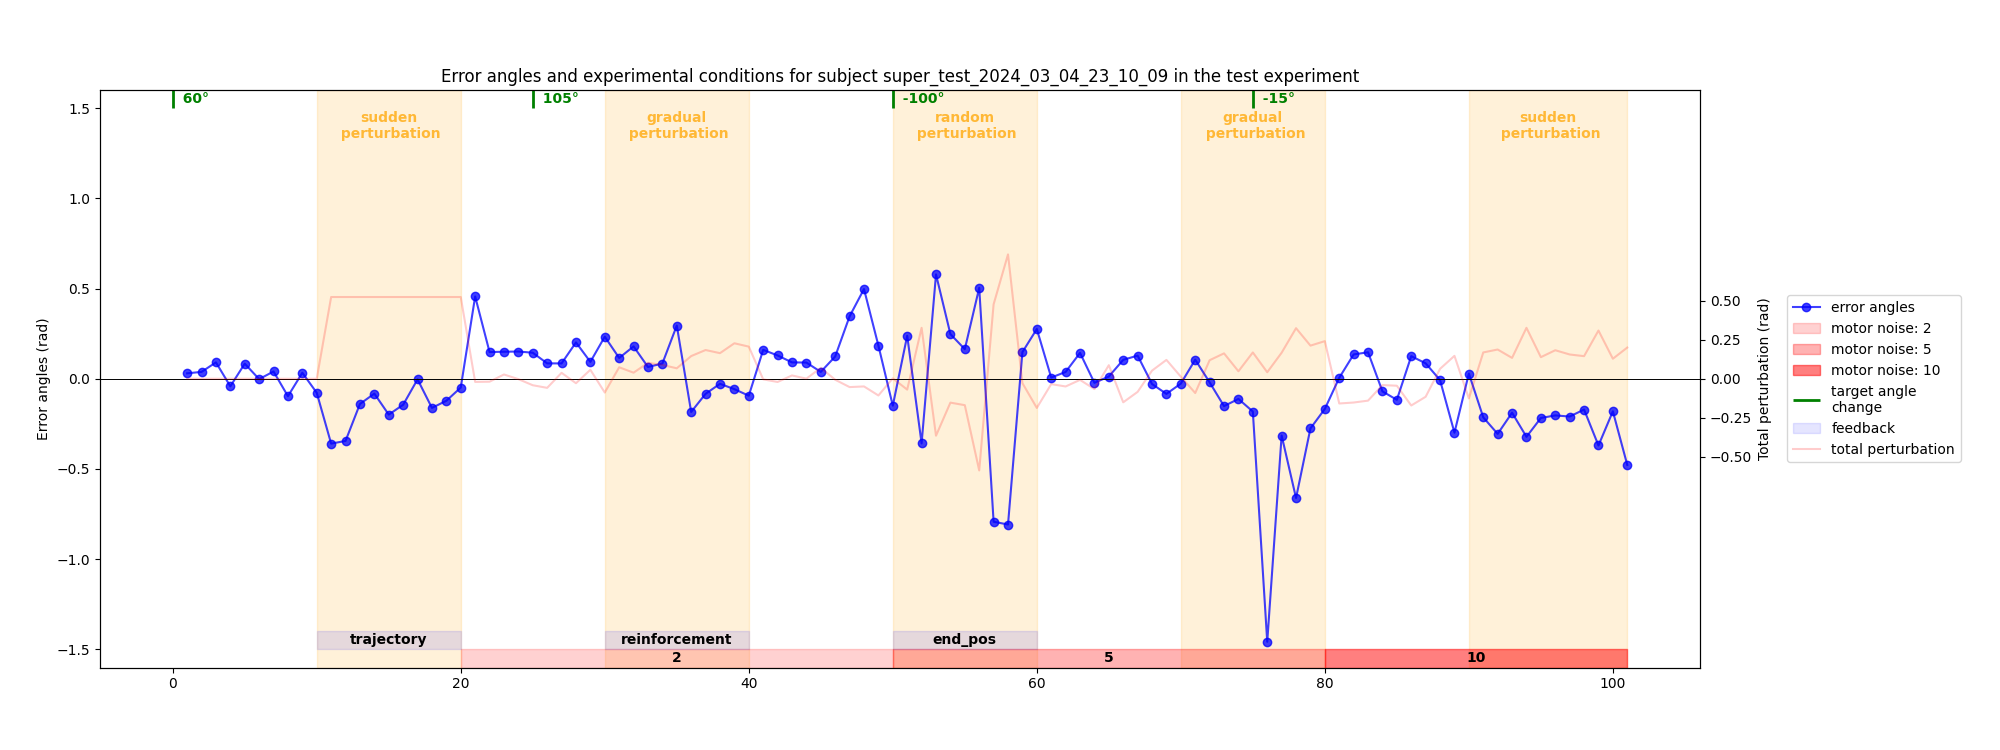

## Conclusion


The program described, with its sophisticated integration of motor noise experiments, perturbation models, and adaptive feedback mechanisms, represents a tool for the study of motor learning and adaptation. By simulating various conditions that challenge the motor system—such as motor noise, visual and mechanical perturbations, and altered feedback — it enables to dissect the underlying mechanisms of motor control and adaptation in a controlled environment.

Key features of the program include its ability to dynamically adjust experimental parameters based on participant performance, the incorporation of different types of feedback to facilitate learning, and the provision for manual intervention to explore specific research questions.

Furthermore, the program's design allows for a high degree of flexibility and customization, enabling researchers to tailor the experimental setup to their specific study requirements.

In conclusion, this program stands out as an exemplary tool for studying motor learning and adaptation.